# <span style="color:blue">Desafío - Tabaquismo y gestación</span>

## <span style="color:orange">Cargamos los datos</span>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, percentileofscore

data = pd.read_csv ('/Users/andrea/Desktop/DATA SCIENCE/Modulo 3-Python-Estadistica/Variable aleatoria I/Desafio/baby.csv')


### <span style="color:green">1</span>.- Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

In [106]:
# Mostrar las primeras filas y verificar la correcta carga de los datos

data.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [23]:
# Obtener infomación de los datos que proporciona el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


In [24]:
# Obtener estadísticas descriptivas (ayuda a entender la distribución y la variabilidad de los datos)

data.dropna().describe()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


### <span style="color:green">2</span>.- Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.

### <span style="color:blue">Explicación del código</span>

1. **Crear histograma**

    - **data['Birth.Weight']**: Utilizamos los datos de la columna *Birth.Weight*.

    - **bins=30**: Divide los datos en 30 intervalos para el histograma.

    - **density=True**: Hace que el área total del histograma sea 1, lo que permite comparar el histograma con una grafica de función normal.
    
    - **edgecolor='blue'**: Define el color de los bordes de las barras del histograma.
    
    - **label='Datos reales'**: Etiqueta los datos del histograma como "Datos", el cual será utilizado en la leyenda del gráfico.
    
    
2. **Ajustar una distribución normal a los datos**

    - **mu, std = stats.norm.fit(data['Birth.Weight'])**: Esta línea de código ajusta una distribución normal a los datos. Calcula **mu** que corresponde a la media y **std** a la desviación estándar de la distribución normal ajustada a los datos.
    
    
3. **Crear una serie de valores para graficar la distribución normal**

    - **xmin, xmax = plt.xlim()**: Obtiene los límites actuales del eje x del gráfico.

    - **x = np.linspace(xmin, xmax, 100)**: Crea 100 puntos equidistantes entre xmin y xmax. Estos puntos se usan para graficar la curva de la distribución normal.

    - **p = stats.norm.pdf(x, mu, std)**: Calcula la función de densidad de probabilidad (PDF) de la distribución normal en cada punto x, usando la media mu y la desviación estándar std obtenidos anteriormente.
    

4. **Graficar la distribución normal**

    - **plt.plot(x, p, 'k', linewidth=2, label='Distribución normal ajustada')** -> Dibuja la curva de la distribución normal ajustada a los datos.
        - x: Valores en el eje x.
        - p: Valores correspondientes de la PDF en el eje y.
        - 'k': Dibuja la curva en color negro.
        - linewidth=2: Define el grosor de la línea.
        - label='Distribución normal ajustada': Etiqueta esta curva como "Distribución normal ajustada" para la leyenda.


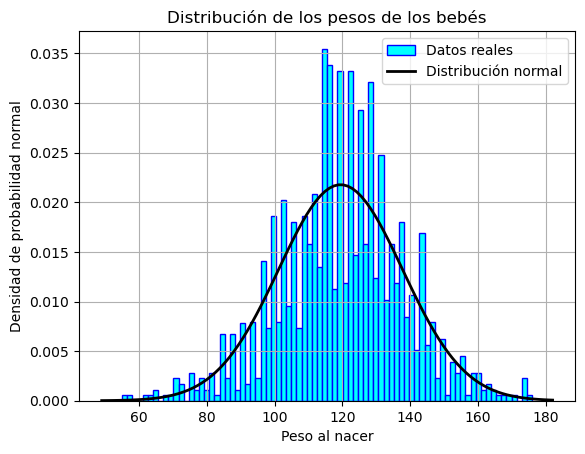

In [25]:
# Crear un histograma
plt.hist(data['Birth.Weight'], bins=80, density=True, color= 'cyan', edgecolor='blue', label='Datos reales')

# Ajustar una distribución normal a los datos
mu, std = stats.norm.fit(data['Birth.Weight'])

# Crear una serie de valores para graficar la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

# Graficar la distribución normal
plt.plot(x, p, 'k', linewidth=2, label='Distribución normal')

# Personalizar gráfico
plt.title('Distribución de los pesos de los bebés')
plt.xlabel('Peso al nacer')
plt.ylabel('Densidad de probabilidad normal')
plt.legend()
plt.grid(True)
plt.show()

#### <span style="color:purple">Respuesta:</span> Se puede observar que la curva de distribución normal se ajusta a los datos aportados

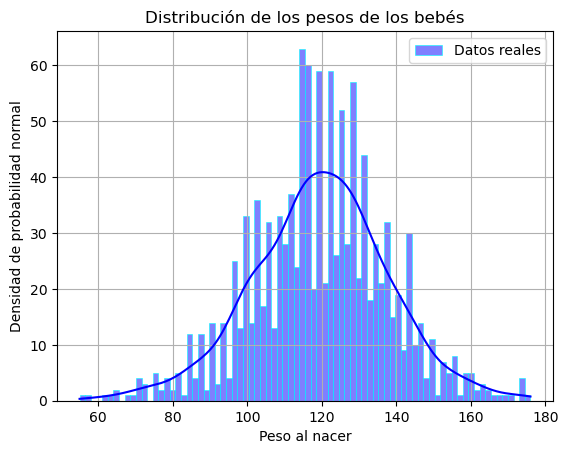

In [26]:
# Existe otra forma de realizar el ejercicio con la librería seaborn para optimizar código. Muestro ejemplo a continuación

sns.histplot(data['Birth.Weight'], bins=80, color= 'blue', edgecolor='cyan', kde=True, label='Datos reales')

# Personalizar gráfico
plt.title('Distribución de los pesos de los bebés')
plt.xlabel('Peso al nacer')
plt.ylabel('Densidad de probabilidad normal')
plt.legend()
plt.grid(True)
plt.show()

### <span style="color:green">3</span>.- Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.

### <span style="color:blue">Explicación del código</span>

1. **Seleccionar los 5 pesos diferentes**

    - **pesos_seleccionados = data['Birth.Weight'].sample(5)**: Se seleccionan aleatoriamente 5 valores de la columna **Birth.Weight**. La función sample(5) se utiliza para obtener una muestra aleatoria de 5 elementos.


2. **Iteración sobre cada peso seleccionado y cálculo del percentil teórico y percentil real**

    - La iteración la hacemos mediante un blucle **for**. A su vez permitirá realizar cálculos para cada uno de los 5 pesos seleccionados.

    - **Cálculo del percentil teórico** -> **prob_teorico = norm.cdf(peso, mean, std_dev)**:
    
        - **prob_teorico** es el percentil teórico del peso según la distribución normal con la media y desviación estándar calculadas de los datos.
        
        - **norm.cdf(peso, mean, std_dev)**: Calcula la función de distribución acumulativa (CDF) para el peso usando una distribución normal con media *mean* y desviación estándar *std_dev*.
        
    - **Cálculo del percentil real** -> **percentil_real = percentileofscore(data['Birth.Weight'], peso)**:
    
        - **percentil_real** es el percentil del peso peso dentro de los datos.
        
        - **percentileofscore(data['Birth.Weight'], peso)**: Se usa la función *percentileofscore* para obteber el percentil de un valor en una muestra de dato. 


In [46]:
# Seleccionar 5 valores diferentes de pesos de bebés
pesos_seleccionados = data['Birth.Weight'].sample(5)

# Calculando media y desviación estándar
mean = data['Birth.Weight'].mean()
std_dev = data['Birth.Weight'].std()

for peso in pesos_seleccionados:
    # Percentil teórico
    prob_teorico = norm.cdf(peso, mean, std_dev)
    
    # Percentil real 
    percentil_real = percentileofscore(data['Birth.Weight'], peso) 
    
    print(f'Peso: {peso}')
    print(f'Percentil Teórico (Distribución Normal): {prob_teorico:.2f}')
    print(f'Percentil Real (Datos Observados): {percentil_real:.2f}\n')

Peso: 136
Percentil Teórico (Distribución Normal): 0.82
Percentil Real (Datos Observados): 82.79

Peso: 110
Percentil Teórico (Distribución Normal): 0.30
Percentil Real (Datos Observados): 28.07

Peso: 102
Percentil Teórico (Distribución Normal): 0.17
Percentil Real (Datos Observados): 16.52

Peso: 99
Percentil Teórico (Distribución Normal): 0.13
Percentil Real (Datos Observados): 12.39

Peso: 101
Percentil Teórico (Distribución Normal): 0.16
Percentil Real (Datos Observados): 15.12



### <span style="color:green">4</span>.- Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Explica y construye los modelos correspondientes.

### <span style="color:blue">Explicación del código</span>

- **Uso de función sns.displot**: permite comparar diferentes gráficos de distribución de datos.


- **data**: Este argumento representa el DataFrame de pandas que contiene los datos.


- **x='Birth.Weight'**: x especifica la variable que se va a graficar en el eje X del gráfico. En este caso serán los valores de la columna'Birth.Weight'.


- **bins=100**: Determina el número de barras en el histograma. *bins=100* indica que el histograma debe tener 100 barras, lo que permite una mayor precisión en la visualización de la distribución de los datos.


- **kde=True, (Kernel Density Estimate)**: Es un parámetro booleano que cuando se establece en True, añade una curva de densidad de kernel sobre el histograma. 


- **hue='Maternal.Smoker'**: Divide los datos según una variable categórica. En este caso, 'Maternal.Smoker' es la columna que indica si la madre es fumadora (True) o no fumadora (False).

Estadísticas descriptivas de los pesos de bebés de madres fumadoras:
count    459.000000
mean     113.819172
std       18.295010
min       58.000000
25%      101.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: Birth.Weight, dtype: float64

Estadísticas descriptivas de los pesos de bebés de madres no fumadoras:
count    715.000000
mean     123.085315
std       17.423695
min       55.000000
25%      113.000000
50%      123.000000
75%      134.000000
max      176.000000
Name: Birth.Weight, dtype: float64


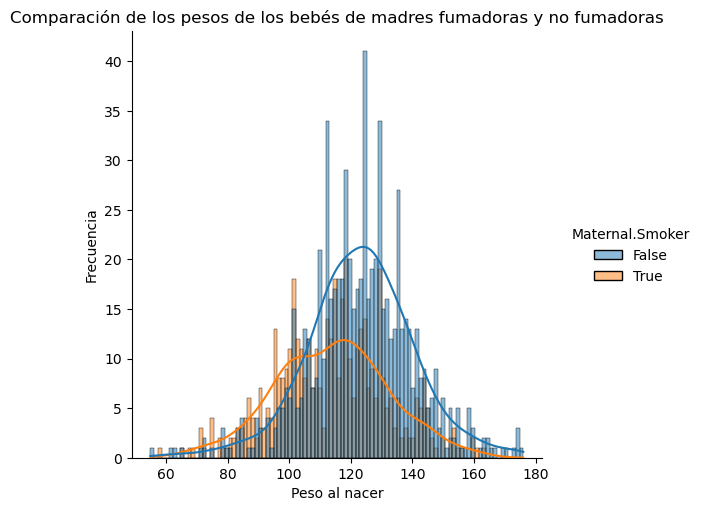

In [55]:
# Separación de datos
fumadoras = data[data['Maternal.Smoker'] == True]
no_fumadoras = data[data['Maternal.Smoker'] == False]

# Estadísticas descriptivas
print("Estadísticas descriptivas de los pesos de bebés de madres fumadoras:")
print(fumadoras['Birth.Weight'].describe())
print("\nEstadísticas descriptivas de los pesos de bebés de madres no fumadoras:")
print(no_fumadoras['Birth.Weight'].describe())

# Comparación de pesos
sns.displot(data, x= 'Birth.Weight', bins=100, kde=True, hue='Maternal.Smoker')

# Personalizar gráfico
plt.title('Comparación de los pesos de los bebés de madres fumadoras y no fumadoras')
plt.xlabel('Peso al nacer')
plt.ylabel('Frecuencia')
plt.show()


#### <span style="color:purple">Respuesta:</span> Impacto del Fumar durante el Embarazo:

El gráfico sugiere que fumar durante el embarazo está asociado con un menor peso al nacer. Los bebés de madres fumadoras tienden a nacer con pesos significativamente más bajos en comparación con los bebés de madres no fumadoras.
La distribución de los pesos de los bebés de madres no fumadoras muestra una curva más ancha y más centrada hacia pesos mayores. La distribución de los pesos de los bebés de madres fumadoras está desplazada hacia la izquierda, hacia pesos menores. Esto indica que los bebés de madres fumadoras tienden a tener un peso menor al nacer.

### <span style="color:green">5</span>.- Considerando los datos dados:

1. Calcula la probabilidad de que una madre escogida al azar fume.
2. A partir del valor anterior, construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 5 madres al azar y observar cuántas fuman.
3. Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias muestrales.
4. Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula sus respectivas medias muestrales.

Utilizando lo anterior:

5. Compara gráficamente los resultados obtenidos anteriormente.
6. Verifica el teorema del límite central, considerando las muestras de datos reales y las simuladas con el modelo binomial.
7. Construye un modelo de distribución normal derivado del modelo binomial, y grafícalo junto a los anteriores para comparar. Concluye.

Probabilidad de que una madre sea fumadora: 0.39


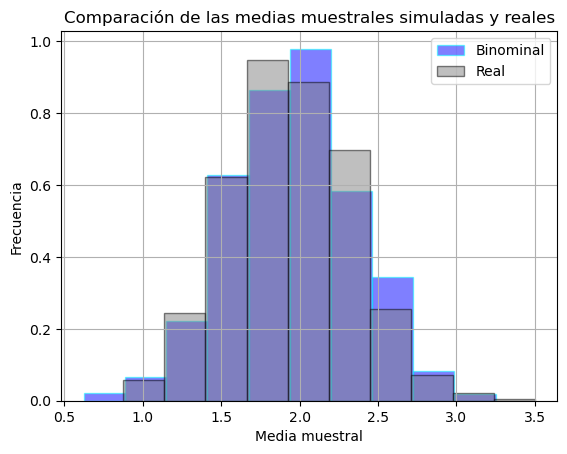

In [150]:
# 1.- Probabilidad de que una madre sea fumadora
datos_num = data['Maternal.Smoker'].dropna()  # Asegurar de borrar datos nulos
madre_fumadora = np.where(datos_num, 1, 0)  # Cambiar valores True por 1 y valores False por 0

p = sum(madre_fumadora) / len(madre_fumadora) # Cálculo de la probabilidad que la madre sea fumadora
print(f'Probabilidad de que una madre sea fumadora: {p:.2f}')

# 2, 3, 4.- Modelo de distribución binomial, generación de muestras teóricas (simulación) y extracción de muestra

# Número de madres seleccionadas
n = 5

# Simular el experimento binomial - Generar muestras teóricas
media_binom = []  # Repositorio de medias muestrales

for i in range(1000):
    media_binom.append(np.mean(np.random.binomial(n, p, size=8))) # Uso de función binominal para generar muestra de valores con una distribución binominal 

# Extraer muestra a partir de datos reales
media = []  # Repositorio media

for x in range(1000):
    muestras = []
    for j in range(8):
        muestras.append(sum(np.random.choice(madre_fumadora, size=5, replace=False))) # Función que selecciona elementos aleatorios de una secuencia 
    media.append(np.mean(muestras))

# 5.- Comparación gráfica de medias simuladas y medias muestrales

# Graficar el histograma de media_binom
plt.hist(media_binom, bins=10, density=True, alpha=0.5, color='blue', edgecolor='cyan', label='Binominal')

# Graficar el histograma de media
plt.hist(media, bins=10, density=True, alpha=0.5, color='grey', edgecolor='black', label='Real')

# Añadir título y etiquetas
plt.title('Comparación de las medias muestrales simuladas y reales')
plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

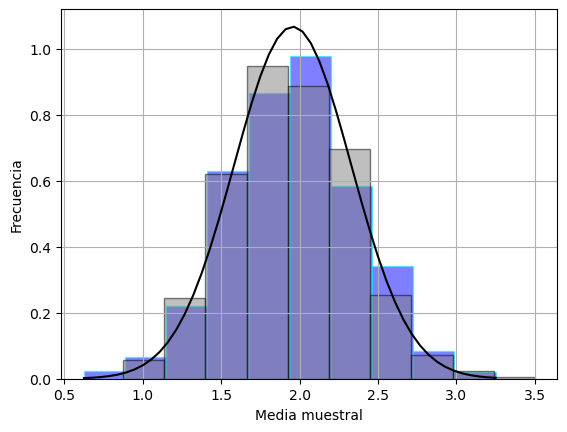

In [151]:
# 6, 7.- Verificar el Teorema del Límite Central - Construcción del modelo de distribución normal

mu = np.mean(media)
desv_std = np.std(media)
minimo = np.min(media_binom)
maximo = np.max(media_binom)

# Generar una secuencia de valores 'x' entre el mínimo y máximo para trazar la curva normal
x = np.linspace(minimo, maximo, num=50)

# Calcular la función de densidad de probabilidad (PDF) de la distribución normal
# usando la media (mu) y la desviación estándar (desv_std) calculadas anteriormente
pdf = norm.pdf(x, loc=mu, scale=desv_std)

# Calcular la desviación estándar de las medias muestrales reales (variable 'a')
a = np.std(media)

# Calcular la desviación estándar de las medias muestrales simuladas (variable 'b')
b = np.std(media_binom)

# Graficar los histogramas 
plt.hist(media_binom, bins=10, density=True, alpha=0.5, color='blue', edgecolor='cyan', label='Binominal')

plt.hist(media, bins=10, density=True, alpha=0.5, color='grey', edgecolor='black', label='Real')

# Superponer la curva de distribución normal calculada a partir de las medias muestrales reales
plt.plot(x, pdf, color='black', label='Distribución normal')

plt.grid(True)
plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()



#### <span style="color:purple">Respuesta:</span> Conclusiones:

- **Verificación del Teorema del Límite Central**: El gráfico muestra que las medias muestrales siguen una distribución normal, lo cual coincide con el Teorema del Límite Central.

- **Simulación y Datos Reales**: La similitud entre los histogramas de **media_binom** y **media** indica que el modelo binominal utilizado para simular las medias muestrales es apropiado y consistente con los datos reales.

- **Distribución Normal**: La curva muestra una distribución normal, esto es un indicador que el muestreo y los modelos usados son los correctos.